# Capstone Webscrapping using BeautifulSoup

This is a capstone project by Algoritma Data Science school. This notebook explains Web Scrapping about US dollar to Indonesian Rupiah exchange rate using beautifulsoup. 

In [2]:
from IPython.display import Image
Image(url="https://i.pinimg.com/originals/b4/30/9a/b4309afefb9ebd854a1d75ad508a8098.jpg")

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [3]:
import requests
url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [4]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [5]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

In [6]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-04-12">
    April 12, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-04-12">
    2023-4-12
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     14,835
    </span>
   </span>
   <span class="n">
    <span class="nowra


Finding row length.

In [7]:
row_length = len(table.find_all('a', attrs={'class':'n'}))
row_length

129

Table is likely a BeautifulSoup object representing an HTML table. The code is then finding all a tags within the table that have a class of n and all span tags within the table that have a class of w. It is then iterating through the range 0 to row_length (exclusive) and using the index i to extract the text of the a and span tags at that index.

In [8]:
temp = [(table.find_all('a', attrs={'class':'n'})[i].text, 
         table.find_all('span', attrs={'class':'w'})[i].text.strip())
        for i in range(row_length)]
temp

[('2023-4-12', '$1 = Rp14,835'),
 ('2023-4-11', '$1 = Rp14,915'),
 ('2023-4-10', '$1 = Rp14,950'),
 ('2023-4-7', '$1 = Rp14,941'),
 ('2023-4-6', '$1 = Rp14,931'),
 ('2023-4-5', '$1 = Rp14,960'),
 ('2023-4-4', '$1 = Rp14,957'),
 ('2023-4-3', '$1 = Rp14,922'),
 ('2023-3-31', '$1 = Rp14,969'),
 ('2023-3-30', '$1 = Rp15,024'),
 ('2023-3-29', '$1 = Rp15,034'),
 ('2023-3-28', '$1 = Rp15,060'),
 ('2023-3-27', '$1 = Rp15,107'),
 ('2023-3-24', '$1 = Rp15,165'),
 ('2023-3-23', '$1 = Rp15,085'),
 ('2023-3-22', '$1 = Rp15,253'),
 ('2023-3-21', '$1 = Rp15,301'),
 ('2023-3-20', '$1 = Rp15,343'),
 ('2023-3-17', '$1 = Rp15,375'),
 ('2023-3-16', '$1 = Rp15,429'),
 ('2023-3-15', '$1 = Rp15,459'),
 ('2023-3-14', '$1 = Rp15,380'),
 ('2023-3-13', '$1 = Rp15,416'),
 ('2023-3-10', '$1 = Rp15,503'),
 ('2023-3-9', '$1 = Rp15,495'),
 ('2023-3-8', '$1 = Rp15,449'),
 ('2023-3-7', '$1 = Rp15,429'),
 ('2023-3-6', '$1 = Rp15,354'),
 ('2023-3-3', '$1 = Rp15,278'),
 ('2023-3-2', '$1 = Rp15,322'),
 ('2023-3-1', '$1 = R

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date', 'Kurs'))
df.head()

,Date,Kurs
0,2023-4-12,"$1 = Rp14,835"
1,2023-4-11,"$1 = Rp14,915"
2,2023-4-10,"$1 = Rp14,950"
3,2023-4-7,"$1 = Rp14,941"
4,2023-4-6,"$1 = Rp14,931"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [10]:
df.dtypes

Date    object
Kurs    object
dtype: object

In [11]:
df['Kurs'] = df['Kurs'].str.replace(r'\$|1 =|Rp|,', '', regex=True)
df.head()

,Date,Kurs
0,2023-4-12,14835
1,2023-4-11,14915
2,2023-4-10,14950
3,2023-4-7,14941
4,2023-4-6,14931


In [12]:
df = df.astype({'Date': 'datetime64[ns]', 'Kurs': 'float'})
df.dtypes

Date    datetime64[ns]
Kurs           float64
dtype: object

The set_index method of a DataFrame allows you to specify which column should be used as the new index. In this case, the column named 'Date' is passed as the argument to set_index.

In [13]:
df = df.set_index('Date')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: xlabel='Date'>

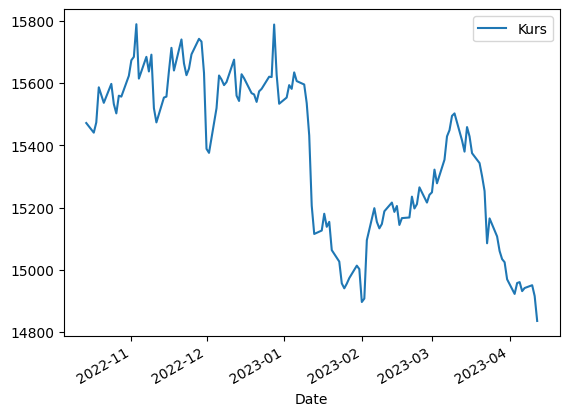

In [14]:
df.plot()

The graph shows that from September 2022 to April 2023, there is a negative relationship between the date and the amount of Rupiah relative to the dollar. This means that the Rupiah consistently weakened compared to the dollar over the course of one semester.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.